# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

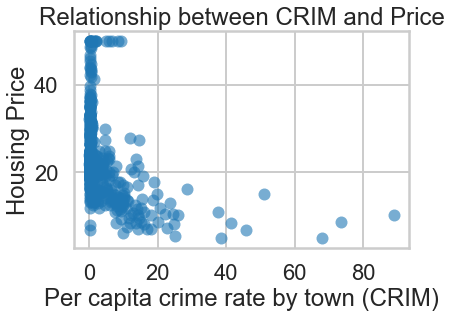

In [12]:
plt.scatter(bos.CRIM, bos.PRICE,alpha=0.6,linewidth=0)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

There seems to be a negative non-linear relationship. It looks like most housing prices are pretty quickly affected by a higher per capita crime rate, this is not surprising. As a per capita crime rate is counting the number of crimes committed per person, anything but a number close to zero seems hardly acceptable for a safe living environment. Interestingly, there is a few houses that are able to withstand this trend (i.e. high housing price at approx. 50 despite a >1 crime rate).

It looks like exponential decay might be a function that could properly model this relationship. Using ln on the crime rate to properly quantify the impact it has on a community could allow us to model this with a linear function.

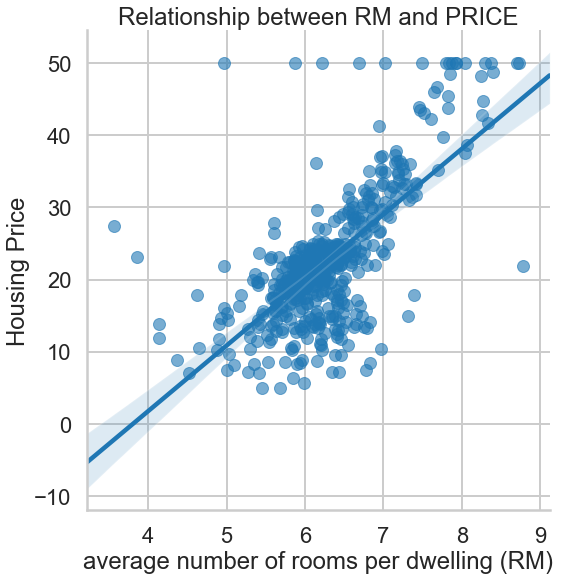

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
_ = sns.lmplot(x='RM',y='PRICE',data=bos,height=8,scatter_kws={'alpha':0.6})
_ = plt.title('Relationship between RM and PRICE')
_ = plt.xlabel('average number of rooms per dwelling (RM)')
_ = plt.ylabel('Housing Price')
plt.show()

The relationship between RM and PRICE is positive and linear. There are a few outliers at the top where median Housing Prices are much higher (3x) than the linear regression model expects. I would expect these to be influenced by other factors or simply faulty data. Nevertheless, the linear model still looks like a pretty good fit, in general, we could say houses in towns with a lower average number of rooms (smaller houses) tend to be cheaper than towns with a higher average number of rooms (larger houses or mansions).

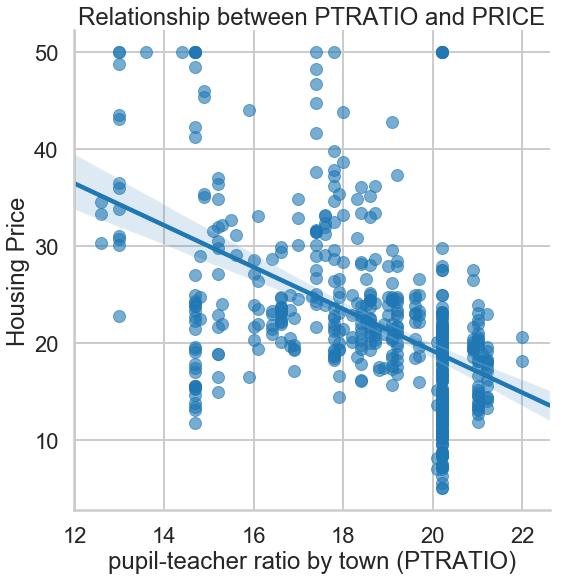

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
_ = sns.lmplot(x='PTRATIO',y='PRICE',data=bos,height=8,scatter_kws={'alpha':0.6})
_ = plt.title('Relationship between PTRATIO and PRICE')
_ = plt.xlabel('pupil-teacher ratio by town (PTRATIO)')
_ = plt.ylabel('Housing Price')
plt.show()

The Pupil-Teacher ratio shows a fraction of how many students (pupils) a teacher is responsible for by their respective town. From a socio-economic standpoint it would be ideal if there was no obvious relationship between median housing prices and the Pupil-Teacher ratio as that would indicate that a child would be able to receive the same level of care from a teacher regardless of the town they live in. Unfortunately, for Boston it looks like there is somewhat of a negative linear relationship between Housing Prices and Pupil-Teacher ratio. Teachers in poorer towns (lower median housing price) tend to be responsible for more pupils than teachers in higher income towns (higher median housing price). 

The range is quite significant, too. The lowest Pupil-Teacher ratio is around 12.5 (30-35k) while the highest is at 22 (18-20k). That's a difference of 9.5 pupils, teachers in lower income areas tend to be responsible for almost twice as many students as those in higher income areas.

That being said, we do see some outliers here, the highest PTRATIO for one of the highest income towns is with 20 on-par with most of the lower income towns. Generally, this relationship shows that if you're able to pay a little more for a house in a wealthier neighborhood, you increase the likelihood of the coveted "small" classes for your child.

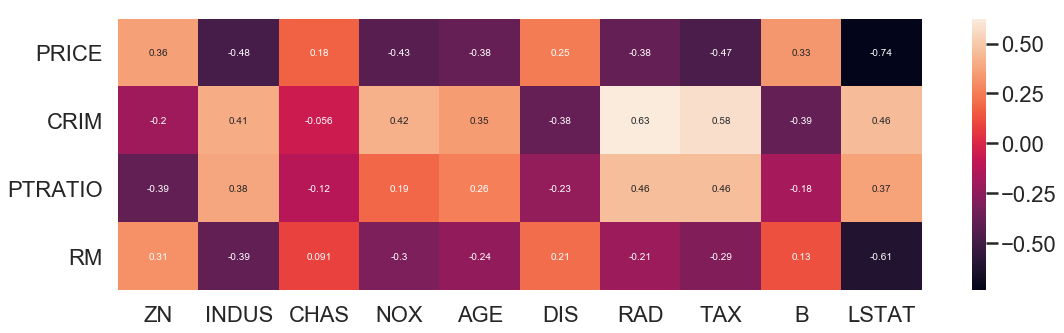

In [15]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
sns.heatmap(bos.corr().loc[['PRICE','CRIM','PTRATIO','RM'],bos.columns.drop(['PRICE','CRIM','PTRATIO','RM'])],annot=True)

In the following we'll look at the variables LSTAT (measures proportion of lower status in population) as it seems to have a high predictor quality (-0.74). There is an abundance of anecdotal evidence that backs the assumption that as the proportion of lower income people increases in a population it negatively affects housing prices.

We'll also look at AGE as it shows moderate correlation with our target variable and there is lesser correlation with the other variables. 

Lastly, we'll inspect TAX as well. It shows a moderate correlation with housing prices, however, if we use this variable we'll have to be aware that introducing this additional variable might cause multi-collinearity, which could destabilize the model.

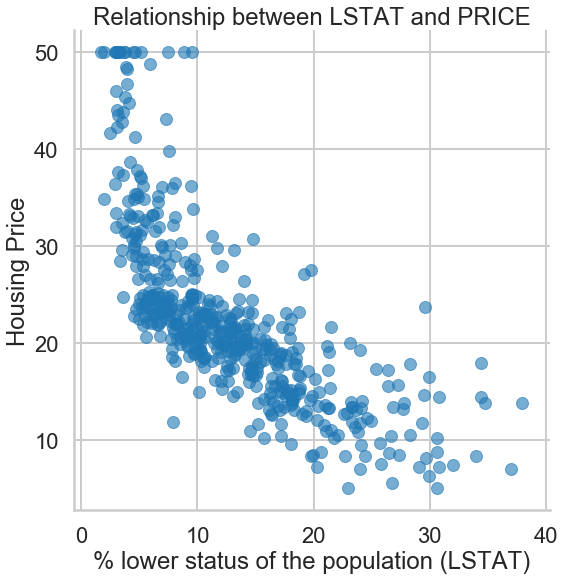

In [16]:
_ = sns.lmplot(x='LSTAT',y='PRICE',data=bos,height=8,scatter_kws={'alpha':0.6},fit_reg=False)
_ = plt.title('Relationship between LSTAT and PRICE')
_ = plt.xlabel('% lower status of the population (LSTAT)')
_ = plt.ylabel('Housing Price')
plt.show()

We can see that the relationship between Median Housing Price is roughly logarithmic related to the LSTAT. 

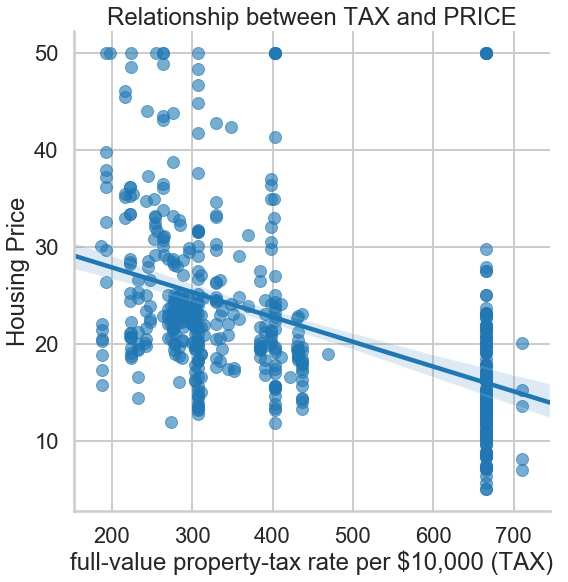

In [17]:
_ = sns.lmplot(x='TAX',y='PRICE',data=bos,height=8,scatter_kws={'alpha':0.6})
_ = plt.title('Relationship between TAX and PRICE')
_ = plt.xlabel('full-value property-tax rate per $10,000 (TAX)')
_ = plt.ylabel('Housing Price')
plt.show()

The full-value property-tax rate per $10,000 and Housing Price relationship shows a negative linear relationship. It doesn't seem to be very strong, as there is a dominance of towns that use a ~660 rate but, generally, I would expect higher priced houses to have a higher tax rate as the assumption is that they are wealthier neighborhoods but this data set shows, if any, the opposite relationship. If you own a house in a town with lower tax rate than (on avg.) you can expect higher median housing price. I could imagine this is due to an increase in demand for housing in towns with lower tax rates.

There's also a quite significant gap between those towns that have a <500 rate and those that have a >650 rate. It would be interesting if there's any reason for this gap, that might shine some light on the negative relationship pointed out above as well. One possible explanation might be the distinction between urban and suburban towns.

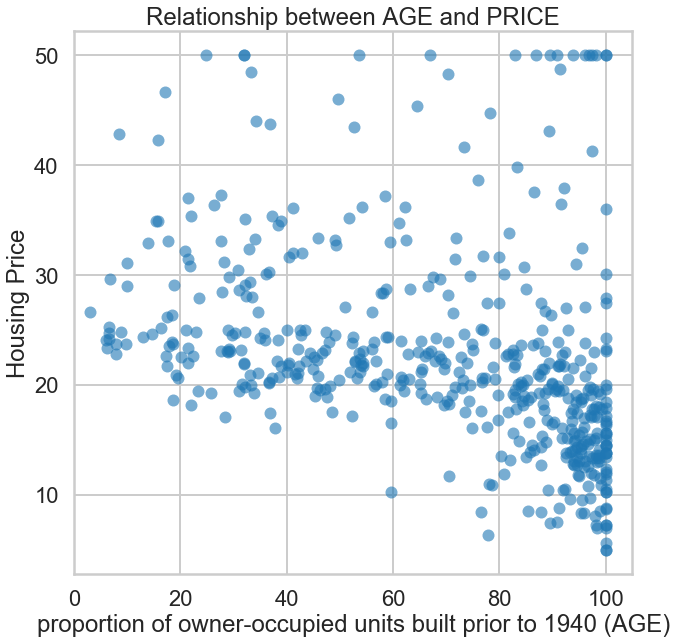

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
_ = sns.scatterplot(x='AGE',y='PRICE',data=bos,alpha=0.6,linewidth=0)
_ = plt.title('Relationship between AGE and PRICE')
_ = plt.xlabel('proportion of owner-occupied units built prior to 1940 (AGE)')
_ = plt.ylabel('Housing Price')
_ = plt.xlim(0,max(bos.AGE) + 5)
plt.show()

It looks like largely there is little relationship between median Housing Prices and the proportion of owner-occupied older houses (built prior to 1940) up to 80%. Once the threshold of 80% is passed there seems to be some negative exponential relationship.

I also noticed that Boston has a lot of towns with a high proportion of older houses.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

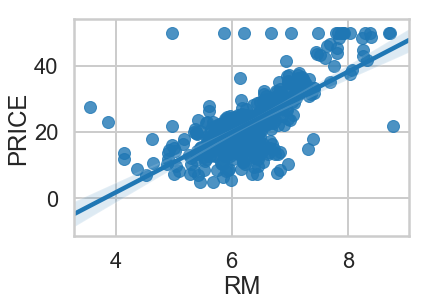

In [20]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


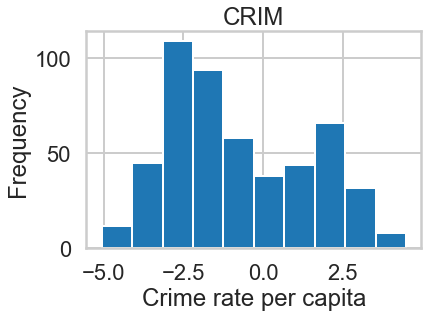

In [21]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

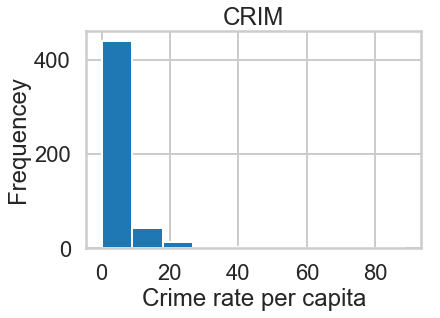

In [22]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

The first graph, provides a larger space for small values and provides a closer look into the distribution of values close to zero.

In the second graph, we can see that the numbers 0 to 8 are all lumped together in one bin. This leads to a skewed representation as it suggests a crime rate of 0 and a crime rate of 8 can be seen as similar values, when in reality a crime rate per capita of 8 is qualitatively different from 0.

Displaying the histogram of the logarithm of the crime rate per capita is a better representation of this metric as we would expect most values to be between 0 and 1. A crime rate per capita of more than 1 is quite excessive and therefore, as can be seen in the graph above, occurs less often. Using the logarithm allows us to spread smaller values across a larger space to better understand them.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [23]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.49e-74
Time:                        09:40:17   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

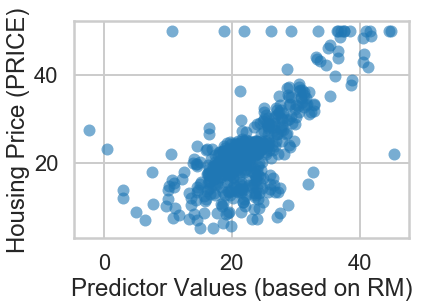

In [25]:
# your turn
_ = sns.scatterplot(m.fittedvalues,bos.PRICE,linewidth=0,alpha=0.6)
_ = plt.xlabel('Predictor Values (based on RM)')
_ = plt.ylabel('Housing Price (PRICE)')
plt.show()

Since this prediction are data points inferred from RM the relationship to Housing Prices itself hasn't changed. However, as the predictor values have shifted in meaning certain predictions are now clearly falling outside the realm of the possible as they are negative values or near-zero. Unless these were subsidized housing prices ($1 houses etc.) these are not accurate predictions and even if they are a valid special case, they should not be used for generalization purposes.

There is a handful of town with a median value of 50k for housing prices despite fewer rooms. Comparing the mean values across features for these towns in this price bracket yields some interesting differences:

In [26]:
bos[(bos['PRICE'] >= 50) & (bos['RM'] <= 7.5)].mean() - bos[(bos['PRICE'] >= 50) & (bos['RM'] > 7.5)].mean()

CRIM         5.293173
ZN         -30.500000
INDUS       10.377667
CHAS         0.200000
NOX          0.106023
RM          -1.774667
AGE         29.033333
DIS         -1.961420
RAD         16.333333
TAX        330.766667
PTRATIO      4.483333
B          -15.759667
LSTAT        1.056000
PRICE        0.000000
dtype: float64

The outliers show almost no residential zoning for >25,000sqft and have a much higher portion of industrial zoned areas. We see a closeness to radial highways and higher taxes. The pupil-teacher ratio is also slightly higher.

One idea might be that these are industry-heavy townships with few people living there but larger factories and offices that drive up the prices. It might help find out why these towns seem to be different if I plotted their location on a map, but that would be beyond this exercise.

### Fitting Linear Regression using `sklearn`


In [27]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
y = bos.PRICE

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [28]:
lm.fit(X,y)
print(lm.coef_)
print(lm.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838508978


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [29]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


### Exercise 1:

In practice, passing a `fit_intercept=False` would remove the intercept term from the Linear regression model. Since we're looking at median value of housing prices in relation to multiple different dimensions, the logic of intercept=0 would have to apply to the sum of all these dimensions to be accurate. If this is not the case and we remove the intercept the entire model becomes biased, even if the intercept was statistically insignificant. 

In our case, even the dimension that might be most likely to satisfy the "regression through the origin" argument, Avg. Number of Rooms per dwelling, is not solid enough. What constitutes a room depends on its definition and since that is not specified more clearly, we should err on the side of caution and keep the intercept.

### Exercise 2:

The fact that the residuals are normally distributed satisfies the requirement that the error must be 0 on average. To satisfy independence, the residuals must show that one data point is (essentially) independent of another. To find evidence of this we often refer to a residual plot and look for a random pattern to confirm or dismiss the linear regression model as a valid option.

### Exercise 3:

False. To perform a linear regression it is not necessary that the sample itself is normally distributed. It is rather the error that must be normally distributed and avg. to 0. It is true that if the latter can be shown we often are in fact dealing with a normal distribution (or an approximation such as the Student t distribution) but it is not an explicit condition. ([source](https://iovs.arvojournals.org/article.aspx?articleid=2128171))

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [30]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508978


In [31]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [32]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [33]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

### Exercise 1:

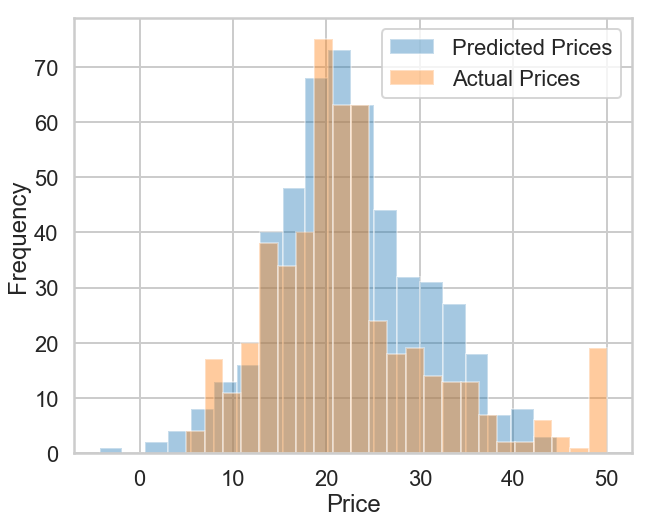

In [34]:
price_pred = lm.predict(X)

fig, ax = plt.subplots(1,1,figsize=(10,8))
_ = sns.distplot(price_pred,ax=ax,kde=False)
_ = sns.distplot(bos.PRICE,ax=ax,kde=False)
_ = plt.xlabel("Price")
_ = plt.ylabel("Frequency")
_ = plt.legend(['Predicted Prices','Actual Prices'])

The majority of predicted prices were between 15 and 25k. The resulting curve has an anomaly and is not exactly normally distributed. This is due to a slight plateau in frequencies at around 27.5k and 35k. This plateau can also be found in the actual Housing Prices but was possibly influenced in frequencies due to the ceiling prices of 50k in the previous analysis (see Actual Prices).

The outliers might unduly skew the model and if we can find that they are actually anomalies we should seriously consider removing them to get a more accurate prediction. This should only be done under careful consideration to avoid _overfitting_.

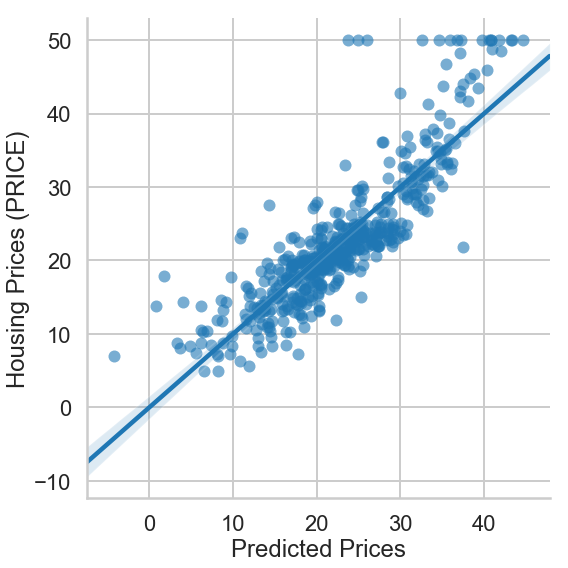

In [35]:
df_pred = pd.DataFrame({'predicted':price_pred,'actual':bos.PRICE})
_ = sns.lmplot('predicted','actual',data=df_pred,height=8,scatter_kws={'linewidth':0,'alpha':0.6})
_ = plt.xlabel('Predicted Prices')
_ = plt.ylabel('Housing Prices (PRICE)')

### Exercise 3

There is a lot of advantages to the statsmodels package. All data stays in one dataframe and can be retrieved using a formula. This reduces the number of steps necessary to wrangle the data into a correct shape and the formula input provides clarity of what action is being performed. The summary function also provides in-depth information with one line, something Scikit-Learn doesn't provide out-of-the-box. At a first glance it seems like the documentation for statsmodels is slightly lacking.

Scikit-Learn on the other hand provides a simple interface and fine-grained control. It's easy to get started right away and the documentation is very thorough. However, the lack of a summary function makes for more necessary code to manually generate the necessary summary statistics. That being said, those extra steps might slow down the workflow in a necessary way to force the due dilligence of having a closer look at the model.

Another observation I had was that it seems Statsmodels way of using one DataFrame for x AND y works better with Seaborn, while Scikit-Learn plays nicely with matplotlib, having x and y separated.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [36]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [37]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064252


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [38]:
# Exercises using Scikit Learn
lm_ptratio = LinearRegression()
X_ptratio = X.PTRATIO

# Reshape
X_ptratio = np.array(X_ptratio).reshape(-1,1)
lm_ptratio.fit(X_ptratio,bos.PRICE)
print("The coefficient is: {}\nThe intercept is: {}".format(lm_ptratio.coef_[0],lm_ptratio.intercept_))
lm_ptratio_pred = lm_ptratio.predict(X_ptratio)

The coefficient is: -2.1571752960609643
The intercept is: 62.34462747483265


The intercept suggests that at a median houseprice value of 62k the Pupil-Teacher Ratio will reach a theoretical value of 0 teacher per pupil. A lower PTRATIO is generally assumed to be positive, however, reaching the value 0 would suggest there are no teachers. We should declare that values in this range won't be properly predicted as this is an outcome that isn't otherwise suggested by the model.

Furthermore the negative coefficient indicates a negative relationship. With every increase of the Pupil-Teacher Ratio (PTRATIO) the median housing price value drops by $2.15k.

In [39]:
def calc_rss(actual,predicted):
    return np.sum((actual - predicted) ** 2)

def calc_ess(actual,predicted):
    return np.sum((predicted - np.mean(actual)) ** 2)

def r_squared(y_actual,y_pred):
    ess = calc_ess(y_actual,y_pred)
    rss = calc_rss(y_actual,y_pred)
    return ess / (ess + rss)

print("The r2 value is: {}".format(r_squared(bos.PRICE,lm_ptratio_pred)))

## Alternative --
## from sklearn.metrics import r2_score
## r2_score(bos.PRICE,lm_ptratio_pred)

The r2 value is: 0.25784731800922267


R2 provides a statistic to evaluate the model fit in terms of percent explained by the model ranging from 0 - 100%. The PTRATIO explains 25.78% of the data, which is generally not considered a good value to use as a predictor.

In some cases (e.g. Psychology), low R2 scores are valid and can still be valuable for interpretation purposes as long as the model is an accurate fit. On the other hand, a high R2 doesn't inherently mean that the model is a good fit. Never underestimate the value of a residual plot and Quantile plot to validate your model.

In [40]:
def calc_MSR(X,y_actual,y_pred):
    return calc_ess(y_actual,y_pred) / len(X[0])

def calc_MSE(X,y_actual,y_pred):
    return calc_rss(y_actual,y_pred) / (len(X) - len(X[0]) - 1)
                                        
def f_stat(MSR,MSE):
    return MSR/MSE

# The critical value for p < .5 with model df = k = 1 and residual df = n - k - 1 = 504
# Closest that could be found for F (1,501) is df1 = 1 and df2 = 1000
f_crit = 3.85
f_stat_ptratio = f_stat(calc_MSR(X_ptratio,bos.PRICE,lm_ptratio_pred), calc_MSE(X_ptratio,bos.PRICE,lm_ptratio_pred))

print("F-Statistic: {}".format(f_stat_ptratio))
print("Significant (p<0.05)? {}".format(f_stat_ptratio > f_crit))

F-Statistic: 175.10554287569516
Significant (p<0.05)? True


The F-Statistic determines whether a group of variables is jointly statistically significant. The F-Test's hypothesis is usually that all the coefficients are equal to zero (meaning the variables have no effect). Since we have a low F-Statistic AND low p-value for the F-Statistic (see below), we can reject H0.

In addition, usually we're measuring the significance of a joint group of variables, which means we can't say anything about the significance of an individual variable. In this case, however, we've only used one variable and can conclude that the PTRATIO has significance (p<0.05).

In [41]:
# For checking purposes we're using statsmodels to validate our results from scikit learn
m_ptratio = ols('PRICE ~ PTRATIO',bos).fit()
m_ptratio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.61e-34
Time:                        09:40:18   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The relationship between t and F-statistic is F = t ** 2.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [42]:
# your turn
m_triple = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
m_triple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 01 May 2019   Prob (F-statistic):           6.15e-98
Time:                        09:40:18   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-Statistic tells me that the joint group of variables is statistically significant (p<0.001). R2 is an indicator for the fit of the model, in this case, the model explains 59.4% of the variance, which indicates a decent fit (>50%).

The Summary shows significant results for the variables Crime Rate (CRIM), Average Number of Rooms per Dwelling (RM) and Pupil-Teacher Ratio (PTRATIO) but a non-significant result for the Intercept. Since the coefficient of the intercept is negative it makes sense that the result is not significant as a negative housing price with a high crime rate, 0 avg. rooms per dwelling and a high Pupil-Teacher ratio is unlikely. That would indicate that you're being paid for living in this town. 

The model suggests that Crime Rate has the least impact on the Median Housing price as on average with every 1 point drop in Crime Rate the Median Housing Price improves by 0.205k. Second to Crime Rate is the Pupil-Teacher Ratio, as a class-size shrinks by 1 pupil per teacher the Median Housing Price increases by 1k. Lastly, as houses have an additional room on avg. the Median Housing Price value increase by more than $7k.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [43]:
# Create a complexer model with an additional variable nitric oxides concentration (parts per 10 million) (NOX)
m_quad = ols('PRICE ~ CRIM + RM + PTRATIO + NOX',bos).fit()

In [44]:
# Compare Models using F-Test
def f_models(rss_simple,m_simple,rss_complex,m_complex):
    return ((rss_simple - rss_complex) / (m_simple.df_resid - m_complex.df_resid)) / (rss_complex/m_complex.df_resid)

triple_pred = m_triple.predict()
quad_pred = m_quad.predict()

rss_triple = calc_rss(bos.PRICE,triple_pred)
rss_quad = calc_rss(bos.PRICE,quad_pred) 

f_models_stat = f_models(rss_triple,m_triple,rss_quad,m_quad)

print("The F Value for the simple model being a better fit is {}.".format(f_models_stat))

f_crit = 1.15840688

print("Significant (p<0.05)? {}".format(f_crit < f_models_stat))

# Alternative using Statsmodels
# from statsmodels.stats.anova import anova_lm
# anova_lm(m_triple,m_quad)

The F Value for the simple model being a better fit is 27.796007468558205.
Significant (p<0.05)? True


In [45]:
print("AIC score of the simple model: {}\nAIC score of the complexer model: {}".format(m_triple.aic, m_quad.aic))

AIC score of the simple model: 3231.9451235449956
AIC score of the complexer model: 3206.6228250958957


Adding the NOX variable to the model improved the model fit. The F Value is significant for p<0.05 and quite a lot above F-Critical (1.16), which indicates that H0 (the simple model being the better fit) can be rejected. Comparing the AIC scores we come to the same conclusion as the complexer model (i.e. model that includes NOX variable) has a lower AIC score. In this case, a lower score indicates a better fit.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

### Exercise 1 - Residual Plot

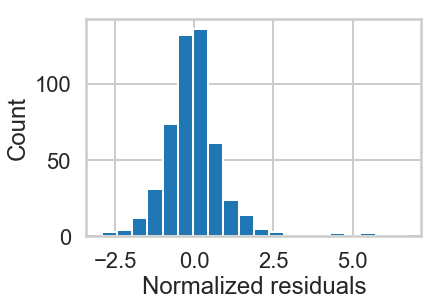

In [46]:
m_triple = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
plt.hist(m_triple.resid_pearson,bins=20)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.show()

The residuals are largely normally distributed, however, it looks like there might be a few outliers on the upper end.

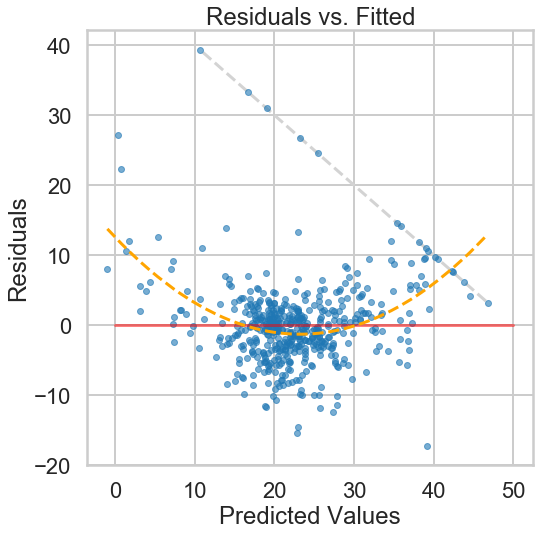

In [47]:
def residual_plot(x,y):
    _ = plt.plot(x,y,marker='.',linestyle='none',alpha=0.6)
    _ = plt.title('Residuals vs. Fitted')
    _ = plt.xlabel('Predicted Values')
    _ = plt.ylabel('Residuals')


def plot_polyfit(x,y,order=1):
    sorted_x = sorted(x)
    trend = np.polyfit(x,y,order)
    trendpoly = np.poly1d(trend) 
    return plt.plot(sorted_x,trendpoly(sorted_x), color='orange', linestyle='--')

fig, ax = plt.subplots(1,1,figsize=(8,8))
_ = plt.plot([11,47],[39,3],color='lightgray',linestyle='--')
_ = residual_plot(m_triple.fittedvalues,m_triple.resid)
_ = plt.plot([0,50],[0,0],color='red',alpha=0.5)
_ = plot_polyfit(m_triple.fittedvalues,m_triple.resid,2)

The plot shows the distance of predicted values vs. actual values. To confirm the assumption of linearity the plot should show no sign of a pattern. It's hard to make out a specific pattern but it does look like there could be a slight parabola pattern (see orange line), especially considering that it looks like the ceiling effect is cutting off values at the gray line. This needs to be investigated in the following steps to see if transformation can resolve this issue.

As suspected, there might also be a few outliers at the top (between y = 22 and y = 40) that might need to be removed but we'll confirm this with a Quantile plot next.

### Exercise 2 - Quantile Plot

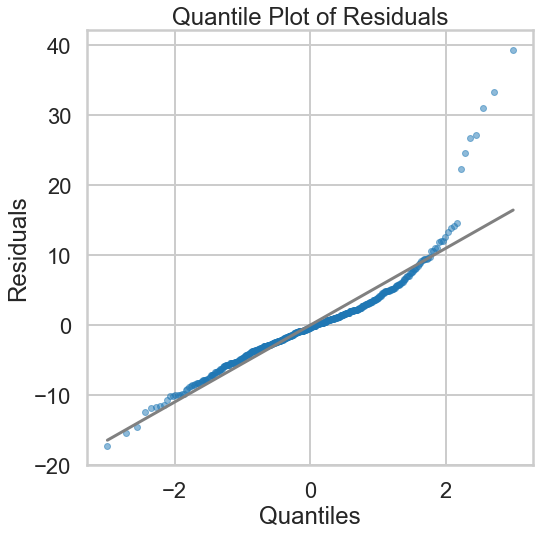

In [48]:
import scipy.stats as stats

def lreg_line(slope,intercept,test_data):
    x_lreg = np.array([min(test_data),max(test_data)])
    y_lreg = slope * x_lreg + intercept
    return x_lreg,y_lreg
        
def qq_plot(data):
    
    (x,y), (slope,intercept,r) = stats.probplot(data, dist="norm", plot=None)
    _ = plt.plot(x,y,marker='.',linestyle='none',alpha=0.5)
    x_lreg,y_lreg = lreg_line(slope,intercept,x)
    _ = plt.plot(x_lreg,y_lreg,color='gray')
    _ = plt.xlabel('Quantiles')
    _ = plt.ylabel('Residuals')
    _ = plt.title('Quantile Plot of Residuals')
    
fig, ax = plt.subplots(1,1,figsize=(8, 8))
qq_plot(m_triple.resid)

The quantile plot is helpful to compare populations/samples with each other, even if their sizes differ as specific quantiles are compared rather than the complete data set. In this case, as happens often, the plot compares the residuals to a theoretical normal distribution to check if normality applies. 

The quantile plot shows that there are some outliers between the 2. and 3. quantile compared to a normal distribution and we'll tend to these later. However, as these are on the far end tail of the distribution the assumption of normality does seem to apply.

### Exercise 3 - Residual vs. Quantile Plot

The quantile plot makes identification of outliers easier and comparing distributions, specifically the assumption of normality. The residual plot on the other hand makes it easier to confirm linearity, detect patterns that diverge from linearity and provides evidence to check for equal error variances (or constant standard deviations).

### Exercise 4 - Outliers

We've now identified a few possible outliers and possibly some curiosity in the pattern using the fitted values vs residuals plot and the quantile plot. Next we'll try and narrow down what predictors might be causing different issues in the model and identify the possible origins of some outliers where possible.

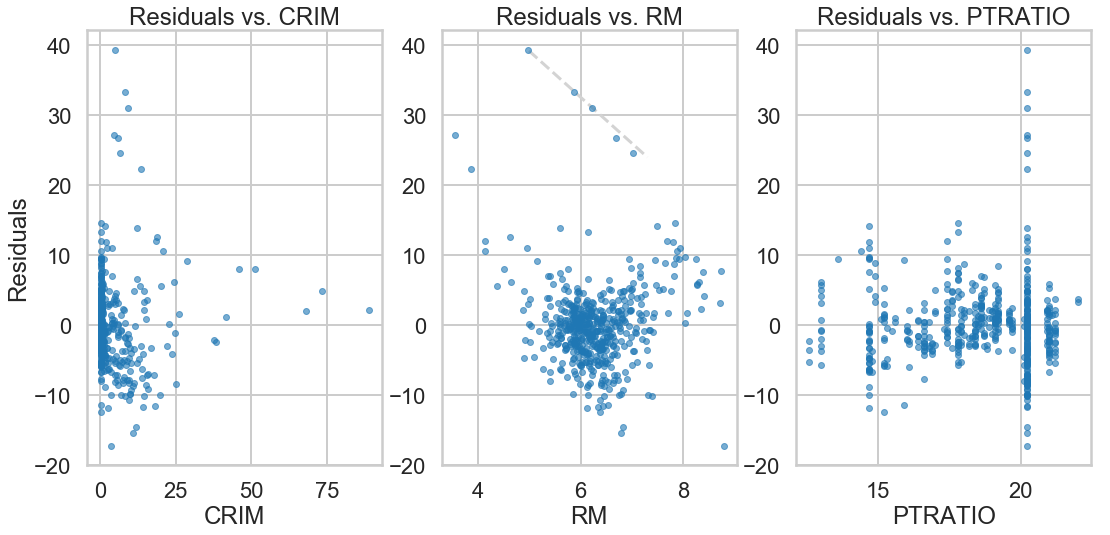

In [49]:
fig, ax = plt.subplots(1,3,figsize=(18,8))
_ = plt.subplot(1,3,1)
_ = plt.plot(bos.CRIM,m_triple.resid,marker='.',linestyle='none',alpha=0.6)
_ = plt.title('Residuals vs. CRIM')
_ = plt.xlabel('CRIM')
_ = plt.ylabel('Residuals')

_ = plt.subplot(1,3,2)
_ = plt.plot([5,7.3],[39.2,24],color='lightgray',linestyle='--')
_ = plt.plot(bos.RM,m_triple.resid,marker='.',linestyle='none',alpha=0.6)
_ = plt.title('Residuals vs. RM')
_ = plt.xlabel('RM')

_ = plt.subplot(1,3,3)
_ = plt.plot(bos.PTRATIO,m_triple.resid,marker='.',linestyle='none',alpha=0.6)
_ = plt.title('Residuals vs. PTRATIO')
_ = plt.xlabel('PTRATIO')


Upon individual examination of the different predictor variables we can see three things. 
- There might be high leverage/influence in the CRIM variable, I'll keep an eye on this for the influence analysis part of this examination. In addition, to checking the residual plot for the log of CRIM below.
- The ceiling effect is also more or less visible in the RM variable.
- The pattern of the RM variable also looks very similar to the shape that we've seen above for the predicted values but with a significantly steeper curve.

An additional note, the PTRATIO has a few outliers but at this point I assume they won't have much leverage due to the amount of data points at that PTRATIO (x) fitting the assumed range. Nevertheless, I will keep an eye on this in the leverage analysis.

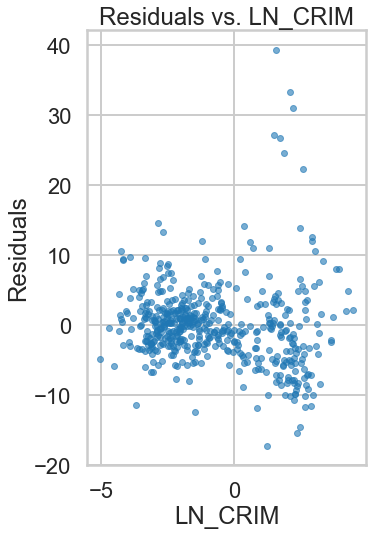

In [50]:
fig, ax = plt.subplots(1,1,figsize=(5,8))
bos['LN_CRIM'] = np.log(bos.CRIM)
_ = plt.subplot(1,1,1)
_ = plt.plot(bos.LN_CRIM,m_triple.resid,marker='.',linestyle='none',alpha=0.6)
_ = plt.title('Residuals vs. LN_CRIM')
_ = plt.xlabel('LN_CRIM')
_ = plt.ylabel('Residuals')

Despite a few outliers at the top, we can see the log of crime improves the pattern. When using transformations, we need to ensure that it doesn't affect the normality assumption of our response variable.

Now let's have a look at some outliers. We'll use a boxplot for this purpose.

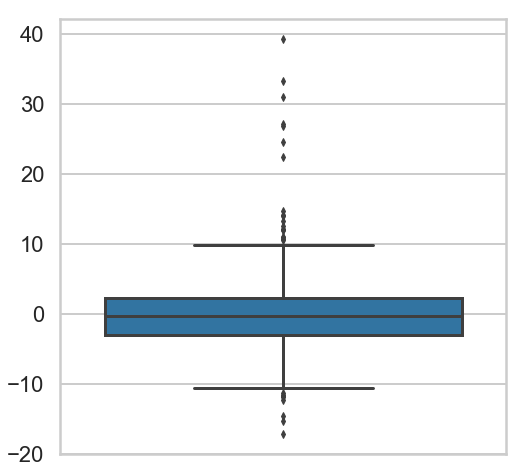

In [51]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
_ = plt.subplot(1,1,1)
_ = sns.boxplot(y=m_triple.resid)

As expected the boxplot confirms quite a few outliers. These outliers represent towns in which our predictors fail to predict the median housing price. Those are occurences where some other variable might be able to better explain the underlying process. 

Nevertheless, it is reassuring the the IQR is almost equal between -10 and 10 and most of the outlier are captured in the interval -20 and 20.

### Exercise 5 - High Leverage Points

<StemContainer object of 3 artists>

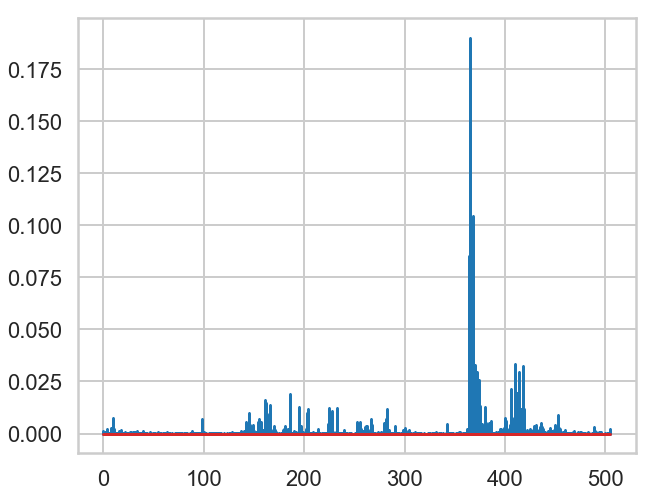

In [52]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

influence = m_triple.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

Interpreting the cook's distance plot, the points are all in the normal range (<0.5). Points beyond .5 should be investigated further and those >1 are generally considered influential data points ((source)[https://newonlinecourses.science.psu.edu/stat501/node/340/]). That being said there are a few points around 360 and 420 that are further out than the rest of the points.

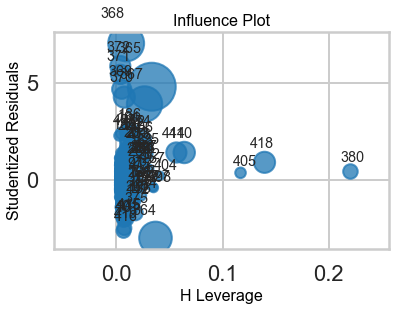

In [53]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(m_triple)
print('')

A high leverage point is an outlier that with slight variations in position can greatly impact the model and sometimes these points unduly influence an otherwise sound model.

The influence plot shows the outliers at index 405, 418 and 380 have a higher influence on the model than others. To remedy this issue, we'll try to resolve it by using a logarithm on the Crime Rate (CRIM), for the reasons mentioned in a previous section. This concurs with the requirements of a linear model (https://newonlinecourses.science.psu.edu/stat501/node/318/)

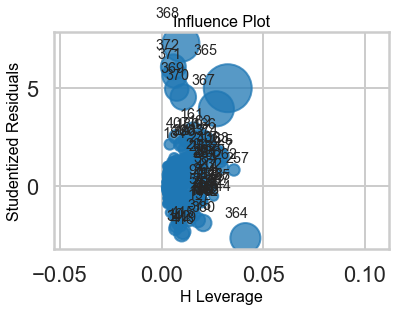

In [54]:
bos['LN_CRIM'] = np.log(bos.CRIM)
m_triple_log = ols('PRICE ~ LN_CRIM + RM + PTRATIO',data=bos).fit()
influence_plot(m_triple_log)
print('')

We can see that using ln CRIM resolved the influence issue. As this has changed the model we'll need to check whether the other requirements still apply (i.e. normal distribution of errors, linearity and constant standard deviation)

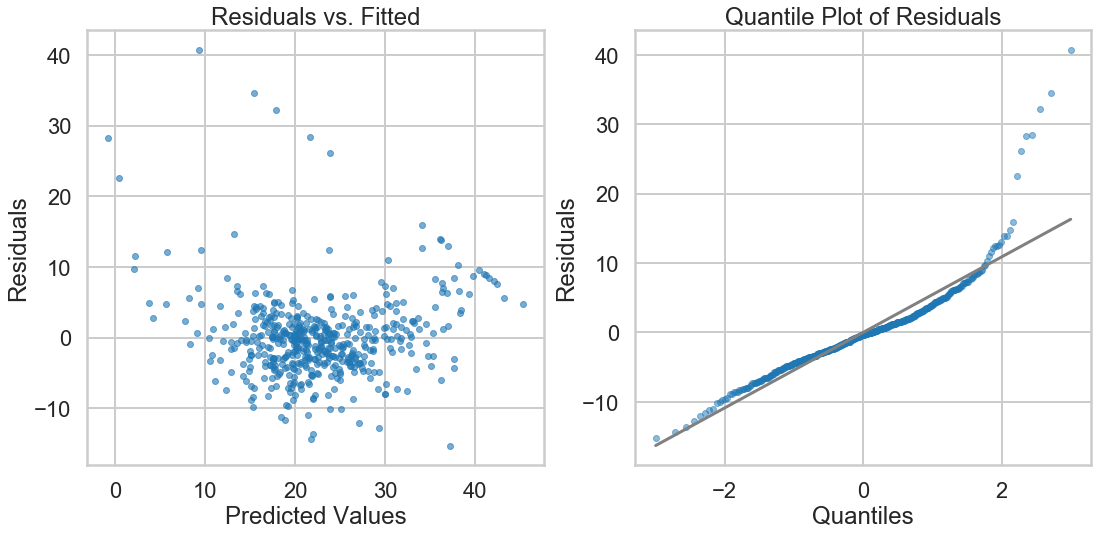

In [55]:
def combo_plot(x,y):
    fig, ax = plt.subplots(1,2,figsize=(18,8))
    plt.subplot(1,2,1)
    _ = residual_plot(x,y)
    plt.subplot(1,2,2)
    _ = qq_plot(y)
    
combo_plot(m_triple_log.fittedvalues,m_triple_log.resid)

While the LN_CRIM seems to be a better fit for the linear model it has caused the parabola to be slightly steeper in the Residual Plot and the outliers in the Quantile Plot to drift further away from the normal function.

We'll now remove outliers to check if they are unduly shifting the distribution.

In [56]:
outlier_resid = m_triple_log.resid < 20
bos['LN_CRIM_CLEAN'] = bos.LN_CRIM[outlier_resid]
bos['RM_CLEAN'] = bos.RM[outlier_resid]
bos['PTRATIO_CLEAN'] = bos.PTRATIO[outlier_resid]
m_triple_clean = ols('PRICE ~ LN_CRIM_CLEAN + RM_CLEAN + PTRATIO_CLEAN',data=bos).fit()

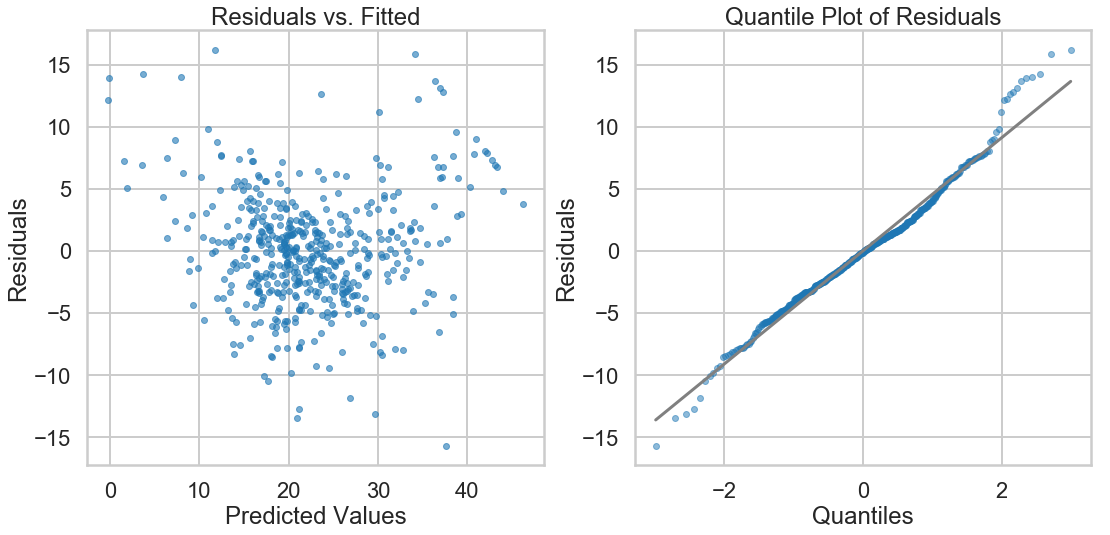

In [57]:
combo_plot(m_triple_clean.fittedvalues,m_triple_clean.resid)

Removing the Outliers and High Leverage points (Residual > 20) improved the fit of the linear model as we can't detect a pattern anymore in the residual vs. fitted values plot. As can be seen in the Quantile plot it also improved the normality fit.

There is a few issues that should be pointed out. The model was fit without separating the data into train and test data, this affects its generalizability. There was no cross validation and removing the outliers and high leverage points without a decent explanation affects the ability to generalize the model.